Question 1:  What is Simple Linear Regression?

Answer:

**Simple Linear Regression** is a statistical method used to model the relationship between two variables: a dependent variable and an independent variable. It assumes a linear relationship between them, meaning that a change in the independent variable is associated with a proportional change in the dependent variable. The goal is to find the best-fitting straight line (the regression line) that minimizes the sum of the squared differences between the observed values and the values predicted by the line. This line can then be used to predict the value of the dependent variable based on the independent variable.

Question 2: What are the key assumptions of Simple Linear Regression?

Answer:

The key assumptions of Simple Linear Regression are:



1.   Linearity: The relationship between the independent variable (X) and the dependent variable (Y) is linear.

2.   Independence: The residuals (errors) are independent of each other. This means that the error for one observation does not affect the error for another observation.
3.   Homoscedasticity: The variance of the residuals is constant across all levels of the independent variable. In simpler terms, the spread of the residuals should be roughly the same along the regression line.


4. Normality: The residuals are normally distributed. This assumption is particularly important for hypothesis testing and constructing confidence intervals.





Question 3: What is heteroscedasticity, and why is it important to address in regression
models?

Answer:

Heteroscedasticity occurs when the variance of the residuals (the errors in the prediction) is not constant across all levels of the independent variable(s). In simpler terms, it means the spread of the residuals is uneven; they might be wider for some values of the independent variable and narrower for others.

It is important to address heteroscedasticity in regression models for several reasons:


1.   Inefficient Coefficient Estimates: While OLS (Ordinary Least Squares) estimates remain unbiased and consistent even in the presence of heteroscedasticity, they are no longer the most efficient (i.e., they have higher variance than they should). This means your estimates are less precise.



2.   Incorrect Standard Errors: Heteroscedasticity leads to biased and inconsistent standard errors. This is a critical issue because standard errors are used to calculate p-values, confidence intervals, and hypothesis tests. If standard errors are incorrect, your conclusions about the statistical significance of your independent variables will be unreliable.
3.   Invalid Hypothesis Tests: Due to incorrect standard errors, t-tests and F-tests (which are based on these standard errors) will be invalid. This can lead to incorrect inferences about the population parameters.




4.  Misleading Confidence Intervals: Confidence intervals for the regression coefficients will be too wide or too narrow, meaning they won't accurately reflect the uncertainty around your estimates.



Question 4: What is Multiple Linear Regression?

Answer:

Multiple Linear Regression is an extension of simple linear regression that models the relationship between a dependent variable and two or more independent variables. Similar to simple linear regression, it assumes a linear relationship between the dependent variable and each independent variable. The goal is to find the best-fitting linear equation that minimizes the sum of the squared differences between the observed values and the values predicted by the model. This model can then be used to predict the value of the dependent variable based on multiple independent variables, allowing for a more comprehensive understanding of the factors influencing the outcome.

Question 5: What is polynomial regression, and how does it differ from linear
regression?

Answer:Polynomial Regression is a form of regression analysis in which the relationship between the independent variable (x) and the dependent variable (y) is modeled as an nth-degree polynomial. While it still falls under the umbrella of linear models (because it is linear in the coefficients), it allows for a curved relationship between the variables, unlike simple linear regression which models a straight-line relationship.

Here's how it differs from linear regression:




1.   Nature of Relationship:
        
        Linear Regression has a strict linear relation between the independent variables and dependent variables.The model tries to fit a straight line to the data.
        Polynomial regression models a curvilinear relationship.


2.   Equation form:
        
        The highest power of the independent variable is 1 in linear regression.
        The highest power of the independent variable in polynomial regression can be greater than 1.
3.   Flexibility:

        Linear regression is less flexible, suitable for data sets where thers is straight-line relationship.
        Polynomial regression is more flexible,capable of fitting wider range of data patterns.


4.   Complexity:

        Linear regression has a simpler model,easier to interpret.
        Polynomial regression is more complex as the degree of the polynomial increases.



Question 6:  Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.

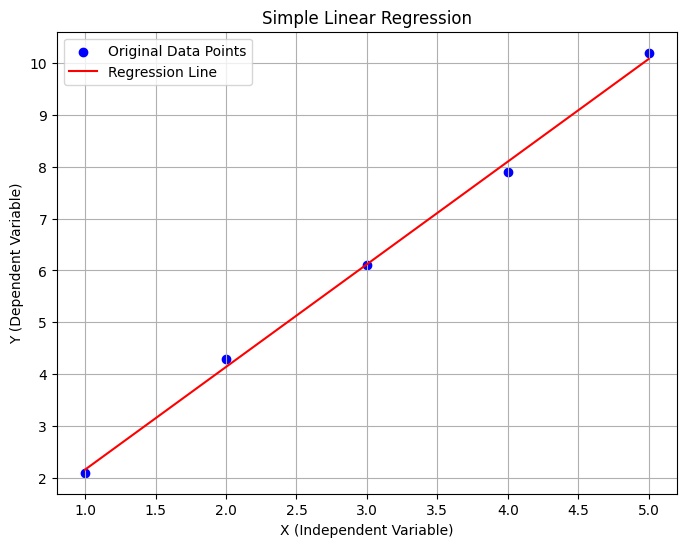

Intercept: 0.18
Coefficient (slope): 1.98


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape X for scikit-learn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Predict Y values using the fitted model
Y_pred = model.predict(X)

# Plot the original data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Original Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient (slope): {model.coef_[0]:.2f}")

Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
area = np.array([1200, 1500, 1800, 2000])
rooms = np.array([2, 3, 3, 4])
price = np.array([250000, 300000, 320000, 370000])

# Create a DataFrame for independent variables (features)
X = pd.DataFrame({
    'Area': area,
    'Rooms': rooms
})

# Dependent variable
Y = price

# Create a Multiple Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Predict Y values using the fitted model
Y_pred = model.predict(X)

print("Multiple Linear Regression Model Results:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_}")
print(f"Coefficient for Area: {model.coef_[0]:.2f}")
print(f"Coefficient for Rooms: {model.coef_[1]:.2f}")

# --- Check for Multicollinearity using VIF ---
print('\nChecking for Multicollinearity (VIF):')

# Add a constant to the DataFrame for VIF calculation, as VIF assumes an intercept
X_vif = X.copy()
X_vif['intercept'] = 1

vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Remove the intercept VIF as it's not relevant for independent variable multicollinearity
vif_data = vif_data[vif_data['feature'] != 'intercept']

print(vif_data)

# Interpretation of VIF:
# A VIF of 1 means no correlation between the variable and any other variables.
# A VIF between 1 and 5 suggests moderate correlation, but usually not severe enough to warrant action.
# A VIF greater than 5 or 10 indicates high multicollinearity, which could be problematic.

for index, row in vif_data.iterrows():
    if row['VIF'] > 10:
        print(f"\nHigh multicollinearity detected for '{row['feature']}' (VIF: {row['VIF']:.2f}).")
    elif row['VIF'] > 5:
        print(f"\nModerate to high multicollinearity detected for '{row['feature']}' (VIF: {row['VIF']:.2f}). Consider addressing.")
    else:
        print(f"\nLow multicollinearity for '{row['feature']}' (VIF: {row['VIF']:.2f}).")


Multiple Linear Regression Model Results:
Intercept: 103157.89
Coefficients: [   63.15789474 34736.84210526]
Coefficient for Area: 63.16
Coefficient for Rooms: 34736.84

Checking for Multicollinearity (VIF):
  feature       VIF
0    Area  7.736842
1   Rooms  7.736842

Moderate to high multicollinearity detected for 'Area' (VIF: 7.74). Consider addressing.

Moderate to high multicollinearity detected for 'Rooms' (VIF: 7.74). Consider addressing.


Question 8:  Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.

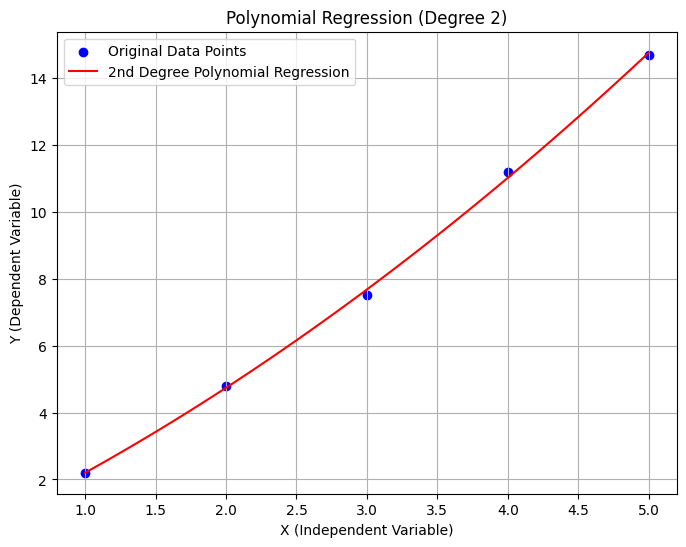

Model coefficients (including intercept): [0.   1.94 0.2 ]
Model intercept: 0.06


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (2nd degree)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly, Y)

# Predict Y values using the fitted model and polynomial features
Y_pred = model.predict(X_poly)

# Plot the original data points and the polynomial regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Original Data Points')

# For plotting the smooth curve, create a finer range of X values
X_plot = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
Y_plot_pred = model.predict(X_plot_poly)
plt.plot(X_plot, Y_plot_pred, color='red', label='2nd Degree Polynomial Regression')

plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Model coefficients (including intercept): {model.coef_}")
print(f"Model intercept: {model.intercept_:.2f}")

# The coefficients correspond to the transformed features: [x^0 (intercept), x^1, x^2]
# model.coef_[0] is the coefficient for x (linear term)
# model.coef_[1] is the coefficient for x^2 (quadratic term)
# model.intercept_ is the constant term (effectively coefficient for x^0)


Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.

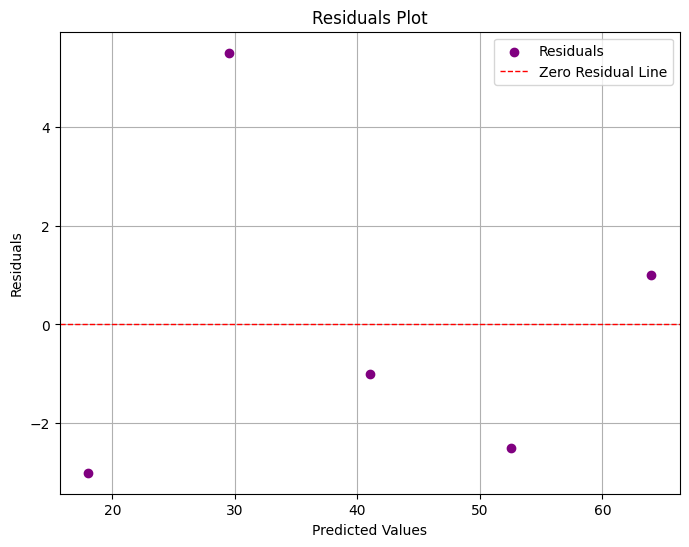

Intercept: 6.50
Coefficient (slope): 1.15


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)  # Reshape X for scikit-learn
Y = np.array([15, 35, 40, 50, 65])

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Predict Y values using the fitted model
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Create a residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Zero Residual Line')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient (slope): {model.coef_[0]:.2f}")


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.

Answer:

As a data scientist predicting house prices, encountering heteroscedasticity and multicollinearity is common. Here's how I would address these issues to ensure a robust model:



1. Detect the Problems

    a) Detect Heteroscedasticity (Non-constant variance of errors)
      
      •	Visual check: Plot residuals vs. fitted values
      o	A “funnel” or increasing spread indicates heteroscedasticity.

      •	Statistical tests:

      o	Breusch–Pagan test

      o	White’s test

b) Detect Multicollinearity (Highly correlated predictors)

•	Correlation matrix / heatmap

•	Variance Inflation Factor (VIF)

o	VIF > 5 (or 10) suggests serious multicollinearity.

•	Condition number of the design matrix
________________________________________
2. Address Heteroscedasticity

Step 1: Transform the Target Variable

•	Apply log, square root, or Box-Cox transformation to house prices
o	Example: log(price)

•	This often stabilizes variance, especially in real estate data.

Step 2: Transform Features

•	Log-transform skewed variables like area, distance to city center, etc.

Step 3: Use Robust Estimation

•	Apply heteroscedasticity-robust standard errors (Huber–White)

o	Coefficients remain the same, but inference becomes reliable.

Step 4: Weighted Least Squares (WLS)

•	Assign weights inversely proportional to error variance

o	Useful when variance structure is known or can be estimated.

Step 5: Consider Non-Linear or Tree-Based Models

•	Models like Random Forest or Gradient Boosting naturally handle heteroscedastic patterns better than OLS.
________________________________________
3. Address Multicollinearity

Step 1: Remove or Combine Correlated Features
•	Example:

o	total_rooms vs. bedrooms

o	area vs. built_up_area

•	Keep the feature with stronger business relevance.

Step 2: Feature Engineering

•	Create ratios or aggregated variables

o	Example: price_per_sqft, rooms_per_area

Step 3: Dimensionality Reduction

•	Principal Component Analysis (PCA)

  o	Reduces correlation but sacrifices interpretability.

Step 4: Regularization Techniques

•	Ridge Regression (L2)

o	Shrinks coefficients, best for multicollinearity.

•	Lasso (L1)

o	Performs feature selection.

•	Elastic Net

o	Combines L1 and L2, often ideal in real estate data.
________________________________________
4. Model Validation and Robustness

•	Use k-fold cross-validation to ensure stability.

•	Compare models using:

o	RMSE / MAE

o	Adjusted R²

•	Check:

o	Residual plots after fixes

o	VIF values after feature selection
________________________________________
5. Final Model Strategy (Practical Choice)

In a real-world real estate setting, I would:

1.	Log-transform price and area

2.	Remove or merge highly correlated features (VIF < 5)

3.	Use Ridge or Elastic Net regression

4.	Validate with cross-validation

5.	Compare with a tree-based model for performance benchmarking
________________________________________
6. Business Impact

•	Heteroscedasticity handled → more reliable confidence intervals & pricing insights

•	Multicollinearity reduced → stable coefficients and better interpretability

•	Robust model → accurate price predictions across cheap and luxury houses

